# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

### Loading the whale data

In [3]:
data=pd.read_csv('Datasets/dataFileWhaleETH.csv')

In [4]:
li = data['tweet'].str.lower().str.cat(sep=' ')

# Getting Tokenization of the text

In [5]:
data = data[['date','time','tweet']]
data['tweet'].head()

0    🚨 🚨  20,000,000 #USDT (20,000,000 USD) transfe...
1    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
2    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
3    🚨 🚨 🚨  29,999,998 #USDT (29,999,998 USD) trans...
4    🚨 🚨 🚨 🚨 🚨 🚨  69,997,439 #USDT (69,997,439 USD)...
Name: tweet, dtype: object

In [6]:
#nums = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'][0]
#data['amountTransfer'] = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'])[0]
data['amountTransfer'] = data['tweet'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')
data['amountTransfer'] = data['amountTransfer'].str[1]

In [7]:
data

,date,time,tweet,amountTransfer
0,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
1,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
2,2021-12-30,23:17:39,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
3,2021-12-30,23:16:11,"🚨 🚨 🚨 29,999,998 #USDT (29,999,998 USD) trans...","29,999,998"
4,2021-12-30,21:49:44,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,439 #USDT (69,997,439 USD)...","69,997,439"
...,...,...,...,...
12886,2021-01-01,10:37:25,"🚨 12,022,800 #USDT (12,013,635 USD) transferr...","12,013,635"
12887,2021-01-01,10:34:18,"🚨 🚨 🚨 🚨 🚨 50,000,000 #USDT (50,023,238 USD) t...","50,023,238"
12888,2021-01-01,10:32:17,"🚨 🚨 🚨 🚨 50,000,000 #USDT (49,700,566 USD) tra...","49,700,566"
12889,2021-01-01,10:29:47,"🚨 🚨 🚨 🚨 🚨 70,000 #ETH (51,883,528 USD) transf...","51,883,528"


# SentimentIntensityAnalyzer for getting sentiments

### Loading dataset price data

In [8]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
priceData = pd.DataFrame(klines)
priceData.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
priceData.index = [dt.datetime.fromtimestamp(x/1000.0) for x in priceData.close_time]
#priceData=priceData[['open', 'high', 'low', 'close']]
priceData=priceData[['close']]
priceData.head()
priceData = priceData.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [9]:
priceData.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,744.82000000
2021-01-01 07:59:59.999,737.38000000
2021-01-01 11:59:59.999,738.85000000
2021-01-01 15:59:59.999,735.39000000
2021-01-01 19:59:59.999,725.34000000


### Five last records of data

In [10]:
priceData.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,3721.88000000
2021-12-31 11:59:59.999,3780.92000000
2021-12-31 15:59:59.999,3784.64000000
2021-12-31 19:59:59.999,3626.27000000
2021-12-31 23:59:59.999,3676.23000000


### Coloumns/features in data

In [11]:
priceData.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [12]:
print('lenght of data is', len(priceData)) #lenght of data

lenght of data is 2190


### Shape of data

In [13]:
data.shape #shape of data

(12891, 4)

### Data information

In [14]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891 entries, 0 to 12890
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12891 non-null  object
 1   time            12891 non-null  object
 2   tweet           12891 non-null  object
 3   amountTransfer  12891 non-null  object
dtypes: object(4)
memory usage: 403.0+ KB


In [15]:
data.head(10-8)

,date,time,tweet,amountTransfer
0,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
1,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891 entries, 0 to 12890
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12891 non-null  object
 1   time            12891 non-null  object
 2   tweet           12891 non-null  object
 3   amountTransfer  12891 non-null  object
dtypes: object(4)
memory usage: 403.0+ KB


In [17]:
#data=data.head(1000)

### Data types of all coloumns

In [18]:
data.dtypes #data types of data

date              object
time              object
tweet             object
amountTransfer    object
dtype: object

### Checking missing Values

In [19]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,date,time,tweet,amountTransfer


### Count of missing values

In [20]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [21]:
data.isnull().values.any() #checking the null values 

False

In [22]:
data.iloc[9:25]

,date,time,tweet,amountTransfer
9,2021-12-30,20:34:41,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,459 #USDT (69,997,459 USD)...","69,997,459"
10,2021-12-30,19:51:28,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,479 #USDT (69,997,479 USD)...","69,997,479"
11,2021-12-30,19:27:23,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,479 #USDT (69,997,479 USD)...","69,997,479"
12,2021-12-30,17:59:53,"🚨 19,997,499 #USDT (19,997,499 USD) transferr...","19,997,499"
13,2021-12-30,17:41:00,"🚨 19,997,519 #USDT (19,997,519 USD) transferr...","19,997,519"
14,2021-12-30,17:13:15,"🚨 🚨 21,200,749 #USDT (21,200,749 USD) transfe...","21,200,749"
15,2021-12-30,17:04:52,"🚨 19,997,519 #USDT (19,997,519 USD) transferr...","19,997,519"
16,2021-12-30,16:47:03,"🚨 19,997,539 #USDT (19,997,539 USD) transferr...","19,997,539"
17,2021-12-30,16:37:27,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 83,014,254 #USDT (83,014,254 ...","83,014,254"
18,2021-12-30,16:24:35,"🚨 19,997,539 #USDT (19,997,539 USD) transferr...","19,997,539"


### Counts of missing values in each column

In [23]:
data.isnull().sum() #checking the null values columns wise 

date              0
time              0
tweet             0
amountTransfer    0
dtype: int64

In [24]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
priceData['close']=priceData['close'].astype(float)

### Spliting date into day, month and year

In [25]:
priceData['date'] = priceData.index # taking dates in date column 
priceData.sort_index(ascending=True, inplace=True)
priceData['Month'] = priceData['date'].dt.month # extracting months from data
priceData['Day'] = priceData['date'].dt.day # extracting day from data
priceData['Year'] = priceData['date'].dt.year # extracting year from data
priceData['Hour'] = priceData['date'].dt.hour # extracting year from data
priceData['Minutes'] = priceData['date'].dt.minute # extracting year from data

### Close price with respect to year 

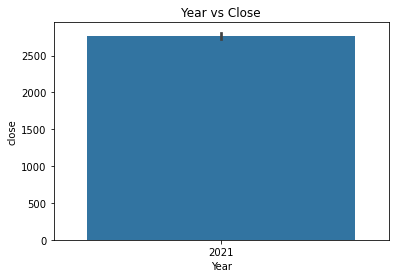

In [26]:
sns.barplot(x='Year', y='close', data=priceData).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

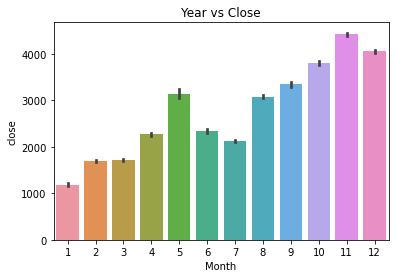

In [27]:
sns.barplot(x='Month', y='close', data=priceData).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Merging whale alerts with price data

# ------------------------------------------------------------------------------------------------------

In [28]:
data.head()

,date,time,tweet,amountTransfer
0,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
1,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
2,2021-12-30,23:17:39,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
3,2021-12-30,23:16:11,"🚨 🚨 🚨 29,999,998 #USDT (29,999,998 USD) trans...","29,999,998"
4,2021-12-30,21:49:44,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,439 #USDT (69,997,439 USD)...","69,997,439"


In [29]:
priceData.head(10)

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,744.82,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,737.38,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,738.85,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,735.39,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,725.34,2021-01-01 19:59:59.999,1,1,2021,19,59
2021-01-01 23:59:59.999,728.91,2021-01-01 23:59:59.999,1,1,2021,23,59
2021-01-02 03:59:59.999,730.39,2021-01-02 03:59:59.999,1,2,2021,3,59
2021-01-02 07:59:59.999,735.12,2021-01-02 07:59:59.999,1,2,2021,7,59
2021-01-02 11:59:59.999,729.70,2021-01-02 11:59:59.999,1,2,2021,11,59
2021-01-02 15:59:59.999,768.43,2021-01-02 15:59:59.999,1,2,2021,15,59


In [30]:
priceData['whaleCount'] = 0

In [31]:
for i, row in enumerate(data.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 1
    else:
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 1

In [32]:
priceData.loc[priceData['whaleCount'] > 0]

,close,date,Month,Day,Year,Hour,Minutes,whaleCount
2021-01-01 11:59:59.999,738.85,2021-01-01 11:59:59.999,1,1,2021,11,59,15
2021-01-01 15:59:59.999,735.39,2021-01-01 15:59:59.999,1,1,2021,15,59,8
2021-01-01 23:59:59.999,728.91,2021-01-01 23:59:59.999,1,1,2021,23,59,8
2021-01-02 11:59:59.999,729.70,2021-01-02 11:59:59.999,1,2,2021,11,59,2
2021-01-02 15:59:59.999,768.43,2021-01-02 15:59:59.999,1,2,2021,15,59,1
...,...,...,...,...,...,...,...,...
2021-12-29 19:59:59.999,3725.68,2021-12-29 19:59:59.999,12,29,2021,19,59,7
2021-12-30 11:59:59.999,3737.68,2021-12-30 11:59:59.999,12,30,2021,11,59,7
2021-12-30 15:59:59.999,3708.74,2021-12-30 15:59:59.999,12,30,2021,15,59,19
2021-12-30 19:59:59.999,3751.06,2021-12-30 19:59:59.999,12,30,2021,19,59,15


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

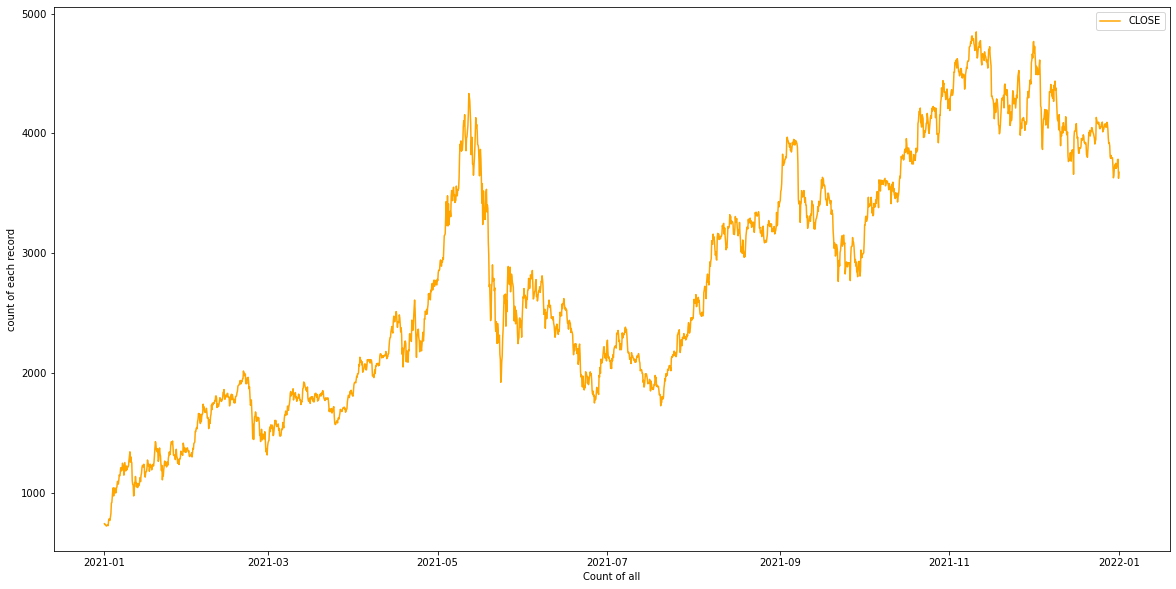

In [33]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(priceData.index, priceData['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [34]:
X=priceData.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,whaleCount
2021-01-01 03:59:59.999,1,1,2021,3,59,0
2021-01-01 07:59:59.999,1,1,2021,7,59,0
2021-01-01 11:59:59.999,1,1,2021,11,59,15
2021-01-01 15:59:59.999,1,1,2021,15,59,8
2021-01-01 19:59:59.999,1,1,2021,19,59,0
...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0


### Taking target as output

In [35]:
y=priceData['close'] # output close 
y #output 

2021-01-01 03:59:59.999     744.82
2021-01-01 07:59:59.999     737.38
2021-01-01 11:59:59.999     738.85
2021-01-01 15:59:59.999     735.39
2021-01-01 19:59:59.999     725.34
                            ...   
2021-12-31 07:59:59.999    3721.88
2021-12-31 11:59:59.999    3780.92
2021-12-31 15:59:59.999    3784.64
2021-12-31 19:59:59.999    3626.27
2021-12-31 23:59:59.999    3676.23
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [36]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

In [37]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=501.236
ARIMA(0, 0, 1) RMSE=510.184
ARIMA(0, 0, 2) RMSE=761.431
ARIMA(0, 1, 0) RMSE=437.761
ARIMA(0, 1, 1) RMSE=437.300
ARIMA(0, 1, 2) RMSE=437.820
ARIMA(0, 2, 0) RMSE=15795.047
ARIMA(0, 2, 1) RMSE=397.357
ARIMA(0, 2, 2) RMSE=394.072
ARIMA(1, 0, 0) RMSE=383.262
ARIMA(1, 0, 1) RMSE=520.644
ARIMA(1, 0, 2) RMSE=451.970
ARIMA(1, 1, 0) RMSE=437.323
ARIMA(1, 1, 1) RMSE=437.450
ARIMA(1, 1, 2) RMSE=437.940
ARIMA(1, 2, 0) RMSE=14209.902
ARIMA(1, 2, 1) RMSE=394.443
ARIMA(1, 2, 2) RMSE=394.833
ARIMA(2, 0, 0) RMSE=504.074
ARIMA(2, 0, 1) RMSE=433.273
ARIMA(2, 0, 2) RMSE=413.093
ARIMA(2, 1, 0) RMSE=437.701
ARIMA(2, 1, 1) RMSE=437.836
ARIMA(2, 1, 2) RMSE=437.772
ARIMA(2, 2, 0) RMSE=10321.809
ARIMA(2, 2, 1) RMSE=394.203
ARIMA(2, 2, 2) RMSE=393.881
ARIMA(4, 0, 0) RMSE=481.501
ARIMA(4, 0, 1) RMSE=409.374
ARIMA(4, 0, 2) RMSE=418.098
ARIMA(4, 1, 0) RMSE=437.748
ARIMA(4, 1, 1) RMSE=437.204
ARIMA(4, 1, 2) RMSE=402.953
ARIMA(4, 2, 0) RMSE=6305.297
ARIMA(4, 2, 1) RMSE=394.184
ARIMA(4, 2, 2

In [38]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [39]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

### Best Parameter selected

In [40]:
best_cfg

(1, 0, 0)

# Evaluation Measures on Test data

# MSE

In [41]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  146889.57277


# MAE

In [42]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  317.21718


# RMSE

In [43]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  383.26175


# MAPE

In [44]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.07327


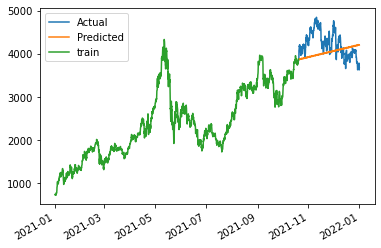

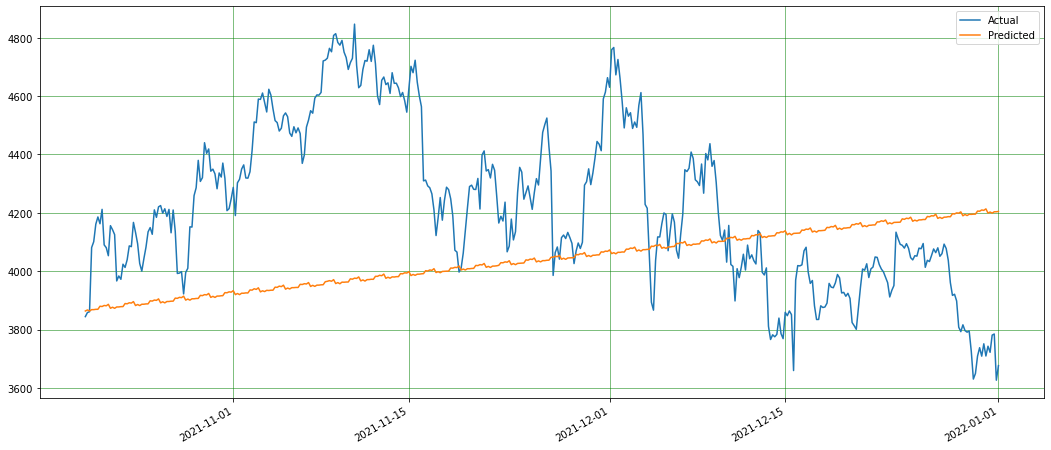

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [46]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=3694.392
ARIMA(0, 0, 1) RMSE=4215.272
ARIMA(0, 0, 2) RMSE=4206.492
ARIMA(0, 1, 0) RMSE=441.595
ARIMA(0, 1, 1) RMSE=444.401
ARIMA(0, 1, 2) RMSE=441.143
ARIMA(0, 2, 0) RMSE=15113.019
ARIMA(0, 2, 1) RMSE=440.271
ARIMA(0, 2, 2) RMSE=438.908
ARIMA(1, 0, 0) RMSE=590.129
ARIMA(1, 0, 1) RMSE=456.275
ARIMA(1, 0, 2) RMSE=455.467
ARIMA(1, 1, 0) RMSE=444.296
ARIMA(1, 1, 1) RMSE=443.464
ARIMA(1, 1, 2) RMSE=440.430
ARIMA(1, 2, 0) RMSE=13406.964
ARIMA(1, 2, 1) RMSE=438.953
ARIMA(1, 2, 2) RMSE=439.119
ARIMA(2, 0, 0) RMSE=573.588
ARIMA(2, 0, 1) RMSE=505.624
ARIMA(2, 0, 2) RMSE=516.830
ARIMA(2, 1, 0) RMSE=441.817
ARIMA(2, 1, 1) RMSE=434.810
ARIMA(2, 1, 2) RMSE=439.332
ARIMA(2, 2, 0) RMSE=9822.758
ARIMA(2, 2, 1) RMSE=443.716
ARIMA(2, 2, 2) RMSE=438.621
ARIMA(4, 0, 0) RMSE=4187.027
ARIMA(4, 0, 1) RMSE=4635.822
LU decomposition error.
ARIMA(4, 1, 0) RMSE=441.793
ARIMA(4, 1, 1) RMSE=446.180
ARIMA(4, 1, 2) RMSE=446.862
ARIMA(4, 2, 0) RMSE=6176.537
ARIMA(4, 2, 1) RMSE=439.785
ARIMA(4, 2, 2

In [47]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=(best_cfg))
results=model.fit()

### Best Parameter selected

In [48]:
best_cfg

(2, 1, 1)

In [49]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [50]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  189059.46489


# MAE

In [51]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  356.73955


# RMSE

In [52]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  434.80969


# MAPE

In [53]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.08123


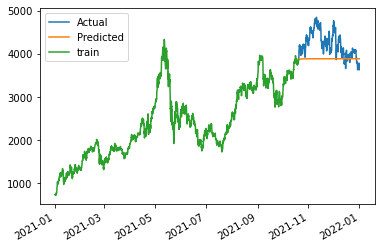

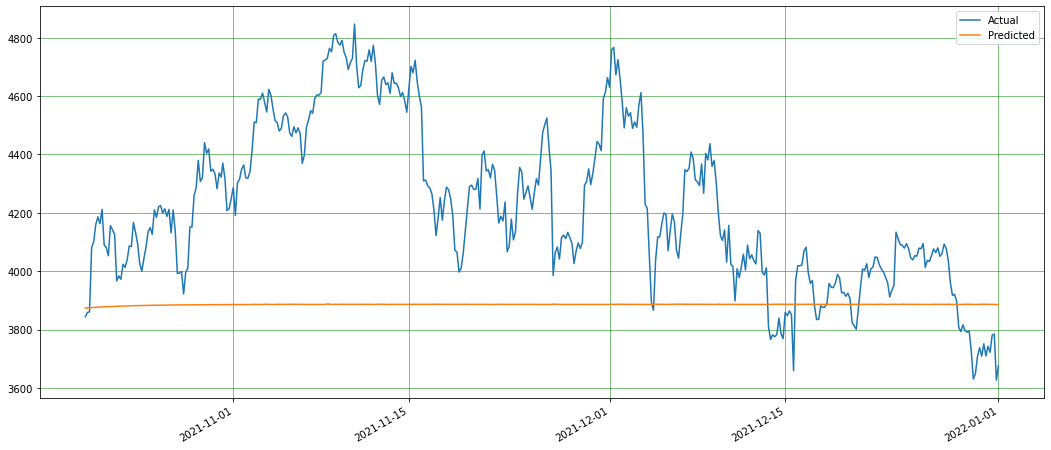

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [55]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [56]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 3866726.39950382
Iteration 2, loss = 2049926.77270769
Iteration 3, loss = 863909.28684918
Iteration 4, loss = 284249.43920132
Iteration 5, loss = 215667.36288659
Iteration 6, loss = 318288.58289133
Iteration 7, loss = 278568.54858692
Iteration 8, loss = 202377.96048607
Iteration 9, loss = 186482.11322507
Iteration 10, loss = 198836.69661774
Iteration 11, loss = 196847.57175519
Iteration 12, loss = 185917.61180242
Iteration 13, loss = 184074.62771096
Iteration 14, loss = 185583.58725589
Iteration 15, loss = 184562.06880438
Iteration 16, loss = 183152.74099218
Iteration 17, loss = 182987.77990190
Iteration 18, loss = 182958.07599393
Iteration 19, loss = 182824.01068105
Iteration 20, loss = 182791.60483865
Iteration 21, loss = 182535.94110011
Iteration 22, loss = 182621.23913013
Iteration 23, loss = 182749.02695460
Iteration 24, loss = 182351.61306366
Iteration 25, loss = 182168.60125467
Iteration 26, loss = 182421.38938403
Iteration 27, loss = 182321.62970706
Iteratio

Iteration 251, loss = 82576.85323882
Iteration 252, loss = 80905.04304235
Iteration 253, loss = 80584.54566904
Iteration 254, loss = 78955.33523802
Iteration 255, loss = 79116.33740374
Iteration 256, loss = 78583.96904879
Iteration 257, loss = 80225.98676891
Iteration 258, loss = 80971.66022812
Iteration 259, loss = 79091.96789475
Iteration 260, loss = 77765.38551166
Iteration 261, loss = 84236.78586501
Iteration 262, loss = 76624.54617260
Iteration 263, loss = 77415.76595674
Iteration 264, loss = 82342.13436077
Iteration 265, loss = 80741.34352514
Iteration 266, loss = 87507.07163155
Iteration 267, loss = 85057.24782764
Iteration 268, loss = 90239.10943360
Iteration 269, loss = 82980.03898246
Iteration 270, loss = 82244.11053465
Iteration 271, loss = 77824.90823099
Iteration 272, loss = 77836.92943587
Iteration 273, loss = 74525.16361226
Iteration 274, loss = 76325.61619434
Iteration 275, loss = 80903.19222788
Iteration 276, loss = 78640.80290957
Iteration 277, loss = 76583.46975560
I

Iteration 137, loss = 147693.01634026
Iteration 138, loss = 143069.29132619
Iteration 139, loss = 133831.16976061
Iteration 140, loss = 134462.63407670
Iteration 141, loss = 131046.38688603
Iteration 142, loss = 128594.55001700
Iteration 143, loss = 128476.34204827
Iteration 144, loss = 127418.21034167
Iteration 145, loss = 127883.33947842
Iteration 146, loss = 126828.41734611
Iteration 147, loss = 125072.33943209
Iteration 148, loss = 125653.12039239
Iteration 149, loss = 123473.65032623
Iteration 150, loss = 121614.06273875
Iteration 151, loss = 121216.12369264
Iteration 152, loss = 121699.43695608
Iteration 153, loss = 118860.16431028
Iteration 154, loss = 118205.67635535
Iteration 155, loss = 118089.26941413
Iteration 156, loss = 120739.30996367
Iteration 157, loss = 124917.91237538
Iteration 158, loss = 118815.96275218
Iteration 159, loss = 120656.90901614
Iteration 160, loss = 115156.54175119
Iteration 161, loss = 116329.79272013
Iteration 162, loss = 113224.32370279
Iteration 16

Iteration 198, loss = 144448.25569417
Iteration 199, loss = 143927.89035774
Iteration 200, loss = 144818.24310164
Iteration 201, loss = 143909.27067857
Iteration 202, loss = 143070.76768606
Iteration 203, loss = 141625.74141368
Iteration 204, loss = 143130.05554307
Iteration 205, loss = 142113.30374139
Iteration 206, loss = 142083.69362353
Iteration 207, loss = 141736.52945604
Iteration 208, loss = 140762.33470793
Iteration 209, loss = 140716.05060802
Iteration 210, loss = 141139.79434940
Iteration 211, loss = 141397.35707308
Iteration 212, loss = 140261.95867805
Iteration 213, loss = 140900.50315212
Iteration 214, loss = 140800.70870976
Iteration 215, loss = 139036.93379741
Iteration 216, loss = 139252.64498796
Iteration 217, loss = 138868.24937619
Iteration 218, loss = 139342.96979001
Iteration 219, loss = 137744.49745729
Iteration 220, loss = 137317.11110952
Iteration 221, loss = 136974.96819926
Iteration 222, loss = 136929.05740506
Iteration 223, loss = 136228.90511380
Iteration 22

Iteration 432, loss = 75374.72412988
Iteration 433, loss = 74570.19948832
Iteration 434, loss = 74739.09886560
Iteration 435, loss = 73970.86661957
Iteration 436, loss = 74722.54919945
Iteration 437, loss = 74435.93420232
Iteration 438, loss = 74335.30260881
Iteration 439, loss = 76370.92665121
Iteration 440, loss = 82610.23790195
Iteration 441, loss = 76838.09188039
Iteration 442, loss = 75015.74379897
Iteration 443, loss = 74002.73847997
Iteration 444, loss = 73063.00488693
Iteration 445, loss = 72927.08063772
Iteration 446, loss = 73045.33963658
Iteration 447, loss = 72880.88636903
Iteration 448, loss = 72451.60040243
Iteration 449, loss = 72803.64298042
Iteration 450, loss = 72623.41333604
Iteration 451, loss = 72095.67495645
Iteration 452, loss = 71807.91001704
Iteration 453, loss = 73338.85434168
Iteration 454, loss = 73333.53257686
Iteration 455, loss = 72124.36852641
Iteration 456, loss = 71423.48745724
Iteration 457, loss = 71147.20206033
Iteration 458, loss = 72881.05136656
I

Iteration 67, loss = 250737.40992089
Iteration 68, loss = 250043.06149791
Iteration 69, loss = 248497.39115678
Iteration 70, loss = 247925.99241447
Iteration 71, loss = 246865.43639279
Iteration 72, loss = 245344.82766467
Iteration 73, loss = 244880.99376626
Iteration 74, loss = 243436.51194790
Iteration 75, loss = 243469.06701763
Iteration 76, loss = 242481.52375956
Iteration 77, loss = 241257.24525560
Iteration 78, loss = 241540.75899633
Iteration 79, loss = 238873.04992331
Iteration 80, loss = 238252.03116923
Iteration 81, loss = 237770.65459932
Iteration 82, loss = 236637.99498071
Iteration 83, loss = 235995.28657523
Iteration 84, loss = 235660.32589789
Iteration 85, loss = 236572.50927393
Iteration 86, loss = 233525.35780123
Iteration 87, loss = 235387.34080956
Iteration 88, loss = 233891.10617328
Iteration 89, loss = 232382.08238578
Iteration 90, loss = 231326.74531468
Iteration 91, loss = 231129.69572076
Iteration 92, loss = 231527.06662617
Iteration 93, loss = 229482.10559065
I

Iteration 301, loss = 122376.90416696
Iteration 302, loss = 121744.58062177
Iteration 303, loss = 120979.68265102
Iteration 304, loss = 119221.82829073
Iteration 305, loss = 116993.88695064
Iteration 306, loss = 117447.19864897
Iteration 307, loss = 117068.96472829
Iteration 308, loss = 115500.29590855
Iteration 309, loss = 114703.58650906
Iteration 310, loss = 114659.47832828
Iteration 311, loss = 114204.49359479
Iteration 312, loss = 114767.79671384
Iteration 313, loss = 112543.02934800
Iteration 314, loss = 114583.56743214
Iteration 315, loss = 113015.74381379
Iteration 316, loss = 112089.92651941
Iteration 317, loss = 111733.68507656
Iteration 318, loss = 114282.83627373
Iteration 319, loss = 113151.86754731
Iteration 320, loss = 115805.13507105
Iteration 321, loss = 109887.69329746
Iteration 322, loss = 108665.65529892
Iteration 323, loss = 109827.06654449
Iteration 324, loss = 110160.59756755
Iteration 325, loss = 109327.15837695
Iteration 326, loss = 107136.10714517
Iteration 32

Iteration 13, loss = 189854.30610632
Iteration 14, loss = 184248.52082781
Iteration 15, loss = 183947.93337879
Iteration 16, loss = 184659.92830794
Iteration 17, loss = 185146.30692396
Iteration 18, loss = 184828.73058214
Iteration 19, loss = 184066.80465221
Iteration 20, loss = 183686.72169948
Iteration 21, loss = 183506.33714560
Iteration 22, loss = 183527.68439878
Iteration 23, loss = 183505.74307750
Iteration 24, loss = 183490.15108581
Iteration 25, loss = 183441.49242810
Iteration 26, loss = 183371.22412065
Iteration 27, loss = 183334.51370712
Iteration 28, loss = 183286.81265133
Iteration 29, loss = 183301.10992126
Iteration 30, loss = 183270.79985737
Iteration 31, loss = 183329.11092610
Iteration 32, loss = 183228.67071878
Iteration 33, loss = 183070.36434887
Iteration 34, loss = 183099.21805313
Iteration 35, loss = 183070.73410982
Iteration 36, loss = 183083.45733933
Iteration 37, loss = 182969.80864621
Iteration 38, loss = 182902.82258379
Iteration 39, loss = 182907.27256761
I

Iteration 262, loss = 141396.00212163
Iteration 263, loss = 140435.96182192
Iteration 264, loss = 140194.63935452
Iteration 265, loss = 140626.42797649
Iteration 266, loss = 139622.91799957
Iteration 267, loss = 139993.28485332
Iteration 268, loss = 139450.58973189
Iteration 269, loss = 138916.93763650
Iteration 270, loss = 139089.10671149
Iteration 271, loss = 138795.55295231
Iteration 272, loss = 138514.43730863
Iteration 273, loss = 139233.60385779
Iteration 274, loss = 139252.01218122
Iteration 275, loss = 138283.81706619
Iteration 276, loss = 137947.66761161
Iteration 277, loss = 137366.67119974
Iteration 278, loss = 137351.51190974
Iteration 279, loss = 136860.65223422
Iteration 280, loss = 136315.40519864
Iteration 281, loss = 136470.49182815
Iteration 282, loss = 136483.66881645
Iteration 283, loss = 137311.39236549
Iteration 284, loss = 135882.40617204
Iteration 285, loss = 135954.82280736
Iteration 286, loss = 135534.27393250
Iteration 287, loss = 135161.21393208
Iteration 28

Iteration 486, loss = 90975.47694721
Iteration 487, loss = 89846.65403946
Iteration 488, loss = 89715.27477919
Iteration 489, loss = 89325.11063020
Iteration 490, loss = 89287.64356227
Iteration 491, loss = 88996.60436224
Iteration 492, loss = 88633.45057544
Iteration 493, loss = 88669.00740470
Iteration 494, loss = 89752.14423454
Iteration 495, loss = 88355.53101833
Iteration 496, loss = 90223.31445471
Iteration 497, loss = 89722.84918398
Iteration 498, loss = 89051.58867248
Iteration 499, loss = 88760.42611052
Iteration 500, loss = 87496.37427131
Iteration 1, loss = 1938428.36084473
Iteration 2, loss = 1247671.04228943
Iteration 3, loss = 751757.52884731
Iteration 4, loss = 446632.44888015
Iteration 5, loss = 312935.12263389
Iteration 6, loss = 284514.78399551
Iteration 7, loss = 305090.50510359
Iteration 8, loss = 316442.10572013
Iteration 9, loss = 305051.22784020
Iteration 10, loss = 288830.75399175
Iteration 11, loss = 282842.58395723
Iteration 12, loss = 282275.50395768
Iteratio

Iteration 233, loss = 182854.03098617
Iteration 234, loss = 181662.40203807
Iteration 235, loss = 181617.37550810
Iteration 236, loss = 180599.67243616
Iteration 237, loss = 181118.25326766
Iteration 238, loss = 179998.68199928
Iteration 239, loss = 179743.56082653
Iteration 240, loss = 178710.64615377
Iteration 241, loss = 181168.51129374
Iteration 242, loss = 178388.55113696
Iteration 243, loss = 177523.06176440
Iteration 244, loss = 177533.31239440
Iteration 245, loss = 177520.68897671
Iteration 246, loss = 177354.26739514
Iteration 247, loss = 177313.51501971
Iteration 248, loss = 175706.26148078
Iteration 249, loss = 176142.91990017
Iteration 250, loss = 174883.36573619
Iteration 251, loss = 173663.45692065
Iteration 252, loss = 173531.82851111
Iteration 253, loss = 172702.83087680
Iteration 254, loss = 173328.76576626
Iteration 255, loss = 172933.83885473
Iteration 256, loss = 172292.16768547
Iteration 257, loss = 172241.95213005
Iteration 258, loss = 173902.87805463
Iteration 25

Iteration 458, loss = 85483.56192620
Iteration 459, loss = 85049.91990882
Iteration 460, loss = 84700.91615502
Iteration 461, loss = 84543.39128010
Iteration 462, loss = 83809.17046304
Iteration 463, loss = 83847.37873365
Iteration 464, loss = 83660.86004774
Iteration 465, loss = 83278.30831546
Iteration 466, loss = 83328.81431785
Iteration 467, loss = 82827.81638280
Iteration 468, loss = 82726.70417911
Iteration 469, loss = 83143.62784243
Iteration 470, loss = 82389.99504922
Iteration 471, loss = 82324.99802683
Iteration 472, loss = 84279.44287550
Iteration 473, loss = 82008.19301953
Iteration 474, loss = 82429.62408463
Iteration 475, loss = 80916.61711757
Iteration 476, loss = 80808.77099298
Iteration 477, loss = 80753.37649905
Iteration 478, loss = 81317.19371076
Iteration 479, loss = 80685.21596220
Iteration 480, loss = 80879.06075300
Iteration 481, loss = 81265.47699421
Iteration 482, loss = 80421.46631173
Iteration 483, loss = 79462.98624053
Iteration 484, loss = 79539.87197365
I

Iteration 15, loss = 279142.34753083
Iteration 16, loss = 278622.32180475
Iteration 17, loss = 277563.39807110
Iteration 18, loss = 277269.79638919
Iteration 19, loss = 276816.54079108
Iteration 20, loss = 276714.32492204
Iteration 21, loss = 276330.06214169
Iteration 22, loss = 275528.79609027
Iteration 23, loss = 274987.03454012
Iteration 24, loss = 274425.54569662
Iteration 25, loss = 274051.83763658
Iteration 26, loss = 273040.73564307
Iteration 27, loss = 272551.99862888
Iteration 28, loss = 271904.90813279
Iteration 29, loss = 270828.54768505
Iteration 30, loss = 269861.45403429
Iteration 31, loss = 268979.77323802
Iteration 32, loss = 268264.28400022
Iteration 33, loss = 268060.10503911
Iteration 34, loss = 265529.81339209
Iteration 35, loss = 265085.61623186
Iteration 36, loss = 262873.28788342
Iteration 37, loss = 261161.94977436
Iteration 38, loss = 259841.27028516
Iteration 39, loss = 258496.64429620
Iteration 40, loss = 257251.33520057
Iteration 41, loss = 256041.04185329
I

Iteration 37, loss = 182846.62311398
Iteration 38, loss = 182514.96542840
Iteration 39, loss = 182192.53285883
Iteration 40, loss = 182259.41881479
Iteration 41, loss = 182142.62071906
Iteration 42, loss = 181914.69768093
Iteration 43, loss = 181843.56626930
Iteration 44, loss = 181758.01780834
Iteration 45, loss = 181694.02711033
Iteration 46, loss = 181348.99143596
Iteration 47, loss = 181154.91507552
Iteration 48, loss = 181013.36023830
Iteration 49, loss = 180959.58581563
Iteration 50, loss = 180770.90421270
Iteration 51, loss = 180502.22137370
Iteration 52, loss = 180347.47191311
Iteration 53, loss = 180121.05547029
Iteration 54, loss = 179798.41321077
Iteration 55, loss = 179594.51488147
Iteration 56, loss = 178940.93287942
Iteration 57, loss = 179261.43326750
Iteration 58, loss = 178467.72762047
Iteration 59, loss = 178400.47167178
Iteration 60, loss = 178195.79797228
Iteration 61, loss = 177428.12833142
Iteration 62, loss = 178031.88675633
Iteration 63, loss = 176743.38801292
I

Iteration 279, loss = 120304.49541747
Iteration 280, loss = 123391.46825859
Iteration 281, loss = 119985.75936948
Iteration 282, loss = 118026.42674225
Iteration 283, loss = 118351.65599045
Iteration 284, loss = 117463.68657732
Iteration 285, loss = 117168.38056700
Iteration 286, loss = 117581.66458938
Iteration 287, loss = 116702.15103947
Iteration 288, loss = 115839.37415093
Iteration 289, loss = 117698.14332936
Iteration 290, loss = 118241.90892262
Iteration 291, loss = 116906.99005591
Iteration 292, loss = 114636.33902857
Iteration 293, loss = 114068.14914284
Iteration 294, loss = 115782.49524294
Iteration 295, loss = 115524.86242986
Iteration 296, loss = 114984.31171117
Iteration 297, loss = 113707.44869820
Iteration 298, loss = 112007.27217312
Iteration 299, loss = 112484.13177684
Iteration 300, loss = 111468.87819573
Iteration 1, loss = 2709745.46574548
Iteration 2, loss = 1669063.21852189
Iteration 3, loss = 961494.16593966
Iteration 4, loss = 530723.96131429
Iteration 5, loss 

Iteration 206, loss = 178051.34217821
Iteration 207, loss = 176429.99753203
Iteration 208, loss = 178813.57260987
Iteration 209, loss = 177644.90546100
Iteration 210, loss = 175870.40716540
Iteration 211, loss = 174607.65922185
Iteration 212, loss = 174830.70291905
Iteration 213, loss = 174449.02808213
Iteration 214, loss = 175695.47505523
Iteration 215, loss = 173142.31816120
Iteration 216, loss = 173370.39914796
Iteration 217, loss = 173767.09224345
Iteration 218, loss = 173961.02463071
Iteration 219, loss = 175063.08744990
Iteration 220, loss = 175034.58799873
Iteration 221, loss = 176933.94539699
Iteration 222, loss = 170673.47467755
Iteration 223, loss = 167637.18269395
Iteration 224, loss = 169519.98421642
Iteration 225, loss = 168968.87888579
Iteration 226, loss = 170873.46032559
Iteration 227, loss = 166869.40619252
Iteration 228, loss = 168754.40094669
Iteration 229, loss = 165703.14187307
Iteration 230, loss = 164462.11793570
Iteration 231, loss = 164423.54982016
Iteration 23

Iteration 61, loss = 275005.39566978
Iteration 62, loss = 274796.00320927
Iteration 63, loss = 274557.84370192
Iteration 64, loss = 274388.01791495
Iteration 65, loss = 274120.50036956
Iteration 66, loss = 273743.21557501
Iteration 67, loss = 273527.44485181
Iteration 68, loss = 273277.46107105
Iteration 69, loss = 273033.18051071
Iteration 70, loss = 272735.20898966
Iteration 71, loss = 272496.47775810
Iteration 72, loss = 272224.41101418
Iteration 73, loss = 271999.30782735
Iteration 74, loss = 271695.02904976
Iteration 75, loss = 271388.16142264
Iteration 76, loss = 271083.59594063
Iteration 77, loss = 270843.64018885
Iteration 78, loss = 270542.58407654
Iteration 79, loss = 270218.05895638
Iteration 80, loss = 269839.78555638
Iteration 81, loss = 269579.74059178
Iteration 82, loss = 269338.61141217
Iteration 83, loss = 268973.68279524
Iteration 84, loss = 268619.77452236
Iteration 85, loss = 268276.55517740
Iteration 86, loss = 268155.21070844
Iteration 87, loss = 267673.84540870
I

Iteration 211, loss = 146905.23607837
Iteration 212, loss = 146511.06286689
Iteration 213, loss = 145499.33850318
Iteration 214, loss = 146076.90959559
Iteration 215, loss = 145574.51721808
Iteration 216, loss = 144894.22951605
Iteration 217, loss = 144853.78344147
Iteration 218, loss = 144596.97574390
Iteration 219, loss = 144557.35751961
Iteration 220, loss = 144381.55110318
Iteration 221, loss = 144863.27708277
Iteration 222, loss = 144448.00863926
Iteration 223, loss = 144170.79670747
Iteration 224, loss = 143456.07826142
Iteration 225, loss = 143805.29102380
Iteration 226, loss = 143745.98228537
Iteration 227, loss = 142519.02772667
Iteration 228, loss = 142226.07950643
Iteration 229, loss = 142381.21565956
Iteration 230, loss = 143324.50180215
Iteration 231, loss = 143805.49021509
Iteration 232, loss = 142228.99005824
Iteration 233, loss = 141047.83160601
Iteration 234, loss = 141684.11501758
Iteration 235, loss = 141625.97461343
Iteration 236, loss = 141024.63933029
Iteration 23

Iteration 454, loss = 83740.90575290
Iteration 455, loss = 83845.33223470
Iteration 456, loss = 83558.80902827
Iteration 457, loss = 86393.97772904
Iteration 458, loss = 83996.04557367
Iteration 459, loss = 81732.69536159
Iteration 460, loss = 81815.04577732
Iteration 461, loss = 82362.94165479
Iteration 462, loss = 82054.94884360
Iteration 463, loss = 82193.45779528
Iteration 464, loss = 81772.63643417
Iteration 465, loss = 82167.24918268
Iteration 466, loss = 81296.85902589
Iteration 467, loss = 80706.73941553
Iteration 468, loss = 81668.72541420
Iteration 469, loss = 81117.08850224
Iteration 470, loss = 83362.17312079
Iteration 471, loss = 84243.15702882
Iteration 472, loss = 79945.33546819
Iteration 473, loss = 84095.27067757
Iteration 474, loss = 88854.22952070
Iteration 475, loss = 88534.54112511
Iteration 476, loss = 85756.32839168
Iteration 477, loss = 81993.49018982
Iteration 478, loss = 83511.95092288
Iteration 479, loss = 83524.50392272
Iteration 480, loss = 81633.06322726
I

Iteration 130, loss = 209256.18744610
Iteration 131, loss = 209169.60984498
Iteration 132, loss = 212514.21493117
Iteration 133, loss = 214002.50530242
Iteration 134, loss = 210360.32178693
Iteration 135, loss = 206872.49021652
Iteration 136, loss = 208386.20332999
Iteration 137, loss = 206013.50671571
Iteration 138, loss = 204955.41138008
Iteration 139, loss = 204493.30199386
Iteration 140, loss = 203779.07376734
Iteration 141, loss = 204568.56932632
Iteration 142, loss = 202726.90555963
Iteration 143, loss = 202822.53681878
Iteration 144, loss = 202220.14927076
Iteration 145, loss = 202082.53636746
Iteration 146, loss = 201062.75034190
Iteration 147, loss = 199837.62339651
Iteration 148, loss = 200597.94591335
Iteration 149, loss = 201051.01265261
Iteration 150, loss = 200555.16641378
Iteration 151, loss = 200615.11590319
Iteration 152, loss = 197241.25507267
Iteration 153, loss = 203260.01901085
Iteration 154, loss = 202874.09238369
Iteration 155, loss = 202592.98615765
Iteration 15

Iteration 377, loss = 88926.63377363
Iteration 378, loss = 89842.94468348
Iteration 379, loss = 90217.27557980
Iteration 380, loss = 90092.92167292
Iteration 381, loss = 87979.19189280
Iteration 382, loss = 88039.15431697
Iteration 383, loss = 89438.98803798
Iteration 384, loss = 87413.33322286
Iteration 385, loss = 89006.11821337
Iteration 386, loss = 87106.19967575
Iteration 387, loss = 87601.15024421
Iteration 388, loss = 87541.84708354
Iteration 389, loss = 87876.17003883
Iteration 390, loss = 85622.16431207
Iteration 391, loss = 87665.50741226
Iteration 392, loss = 85826.95603046
Iteration 393, loss = 84849.97842629
Iteration 394, loss = 85539.06531320
Iteration 395, loss = 84525.52159388
Iteration 396, loss = 88774.55125850
Iteration 397, loss = 85944.71109724
Iteration 398, loss = 84302.20357484
Iteration 399, loss = 84665.32399808
Iteration 400, loss = 83582.34164910
Iteration 401, loss = 84536.83263612
Iteration 402, loss = 83404.72299018
Iteration 403, loss = 83207.01251635
I

Iteration 96, loss = 259607.65450706
Iteration 97, loss = 258876.33561757
Iteration 98, loss = 258885.43100761
Iteration 99, loss = 258147.56831235
Iteration 100, loss = 257702.74110436
Iteration 1, loss = 3747274.78349141
Iteration 2, loss = 2621024.42035626
Iteration 3, loss = 1736312.50935256
Iteration 4, loss = 1067191.39906102
Iteration 5, loss = 603367.30128947
Iteration 6, loss = 326850.61979293
Iteration 7, loss = 202608.19105833
Iteration 8, loss = 184753.79951368
Iteration 9, loss = 205620.40184725
Iteration 10, loss = 214661.29637562
Iteration 11, loss = 206405.85952719
Iteration 12, loss = 194201.52565919
Iteration 13, loss = 185879.56878275
Iteration 14, loss = 184459.88106194
Iteration 15, loss = 184200.52442628
Iteration 16, loss = 184494.04531364
Iteration 17, loss = 184044.84264264
Iteration 18, loss = 183460.31206436
Iteration 19, loss = 183304.26575752
Iteration 20, loss = 183311.08206841
Iteration 21, loss = 183332.50108150
Iteration 22, loss = 183373.25379777
Itera

Iteration 244, loss = 133676.41487742
Iteration 245, loss = 133565.33718694
Iteration 246, loss = 134010.64045832
Iteration 247, loss = 133985.01731482
Iteration 248, loss = 132580.66052426
Iteration 249, loss = 132562.83696592
Iteration 250, loss = 132840.67626476
Iteration 251, loss = 132484.04537247
Iteration 252, loss = 135265.10456932
Iteration 253, loss = 131989.74020943
Iteration 254, loss = 130749.85944566
Iteration 255, loss = 130811.22495032
Iteration 256, loss = 130901.63297181
Iteration 257, loss = 130379.89030494
Iteration 258, loss = 129715.69363286
Iteration 259, loss = 129650.95262838
Iteration 260, loss = 129102.42662261
Iteration 261, loss = 128833.10085038
Iteration 262, loss = 128685.64374162
Iteration 263, loss = 128236.07354164
Iteration 264, loss = 128052.04121989
Iteration 265, loss = 127885.50670866
Iteration 266, loss = 129047.87544997
Iteration 267, loss = 128715.01866030
Iteration 268, loss = 129354.72212160
Iteration 269, loss = 128793.82401404
Iteration 27

Iteration 95, loss = 238591.34602693
Iteration 96, loss = 236793.09697845
Iteration 97, loss = 236778.68794243
Iteration 98, loss = 233674.94175313
Iteration 99, loss = 233398.29949482
Iteration 100, loss = 231458.32488051
Iteration 101, loss = 232207.97015269
Iteration 102, loss = 229758.71264362
Iteration 103, loss = 230094.64478594
Iteration 104, loss = 229539.08986742
Iteration 105, loss = 229938.08834889
Iteration 106, loss = 227463.83667548
Iteration 107, loss = 227013.12514942
Iteration 108, loss = 226579.77541784
Iteration 109, loss = 225386.59359715
Iteration 110, loss = 224814.74462705
Iteration 111, loss = 224353.26914947
Iteration 112, loss = 223343.03158802
Iteration 113, loss = 222693.83291593
Iteration 114, loss = 222008.39664742
Iteration 115, loss = 222444.63550320
Iteration 116, loss = 221521.49565254
Iteration 117, loss = 221878.35876299
Iteration 118, loss = 218835.07107463
Iteration 119, loss = 219691.96109487
Iteration 120, loss = 219212.45574812
Iteration 121, lo

Iteration 346, loss = 106366.91300958
Iteration 347, loss = 107149.16846732
Iteration 348, loss = 105422.64982567
Iteration 349, loss = 104795.85401234
Iteration 350, loss = 104400.78280470
Iteration 351, loss = 103831.78085577
Iteration 352, loss = 103466.95863364
Iteration 353, loss = 102450.61638196
Iteration 354, loss = 102168.81248762
Iteration 355, loss = 102576.62024886
Iteration 356, loss = 101918.14420523
Iteration 357, loss = 101833.86275463
Iteration 358, loss = 102231.95180400
Iteration 359, loss = 102458.58967584
Iteration 360, loss = 102930.70286567
Iteration 361, loss = 102360.01674358
Iteration 362, loss = 100625.63263831
Iteration 363, loss = 100743.56030223
Iteration 364, loss = 100897.65961553
Iteration 365, loss = 98926.28649166
Iteration 366, loss = 99975.31739506
Iteration 367, loss = 98175.76263147
Iteration 368, loss = 98867.44474072
Iteration 369, loss = 96973.63716202
Iteration 370, loss = 96645.46131251
Iteration 371, loss = 99364.38895273
Iteration 372, loss

Iteration 9, loss = 307004.19208284
Iteration 10, loss = 289033.65801104
Iteration 11, loss = 281653.11627284
Iteration 12, loss = 282844.71493379
Iteration 13, loss = 284351.30420081
Iteration 14, loss = 283318.69361231
Iteration 15, loss = 281253.21738316
Iteration 16, loss = 280297.24058172
Iteration 17, loss = 280483.66288853
Iteration 18, loss = 280299.44992569
Iteration 19, loss = 279921.28965259
Iteration 20, loss = 279652.08403502
Iteration 21, loss = 279244.12467006
Iteration 22, loss = 279035.74697253
Iteration 23, loss = 278893.53957238
Iteration 24, loss = 278602.23065693
Iteration 25, loss = 278230.07922264
Iteration 26, loss = 278058.10671933
Iteration 27, loss = 277934.65606672
Iteration 28, loss = 277425.72486497
Iteration 29, loss = 277472.88416675
Iteration 30, loss = 276750.95508822
Iteration 31, loss = 276473.75248862
Iteration 32, loss = 275990.43183239
Iteration 33, loss = 275986.08684954
Iteration 34, loss = 275410.27291098
Iteration 35, loss = 274932.66855402
It

Iteration 35, loss = 216079.23881304
Iteration 36, loss = 207623.35876375
Iteration 37, loss = 204254.91281051
Iteration 38, loss = 200193.94095250
Iteration 39, loss = 200291.41783029
Iteration 40, loss = 208156.68521637
Iteration 41, loss = 203119.49909212
Iteration 42, loss = 192136.50128996
Iteration 43, loss = 187078.71304582
Iteration 44, loss = 184939.62417757
Iteration 45, loss = 181744.77069642
Iteration 46, loss = 180435.98050054
Iteration 47, loss = 178184.42924485
Iteration 48, loss = 177263.13463809
Iteration 49, loss = 176599.05766742
Iteration 50, loss = 171116.25413389
Iteration 51, loss = 169161.52783094
Iteration 52, loss = 166406.76630437
Iteration 53, loss = 164516.59219917
Iteration 54, loss = 163555.46806117
Iteration 55, loss = 161392.43281670
Iteration 56, loss = 162371.08176016
Iteration 57, loss = 157640.71995222
Iteration 58, loss = 154888.60483023
Iteration 59, loss = 154764.79721088
Iteration 60, loss = 151981.39936772
Iteration 61, loss = 150827.01121277
I

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [57]:
Model_R.best_params_

{'momentum': 0.8,
 'max_iter': 600,
 'learning_rate_init': 0.004,
 'hidden_layer_sizes': (300,)}

# Evaluation Measures on Test data

# MSE

In [58]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  903525.8429


# MAE

In [59]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  827.41354


# RMSE

In [60]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  950.53976


# MAPE

In [61]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.1919


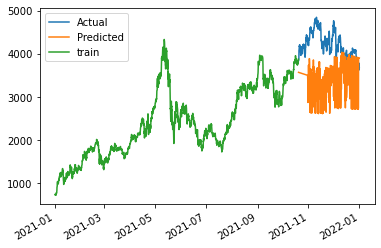

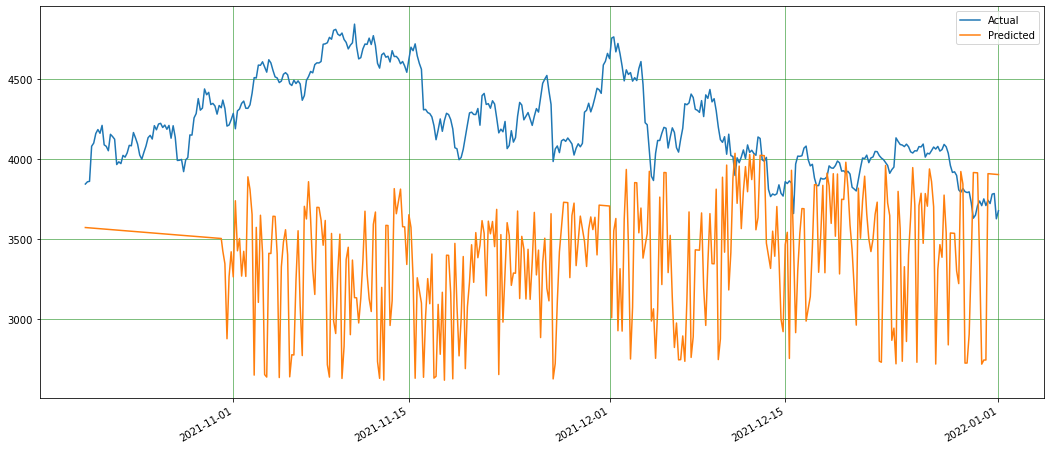

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [63]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [64]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 53.6 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [65]:
Model_R.best_params_

{'tol': 0.001, 'max_iter': 500, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [66]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  396803.31926


# MAE

In [67]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  534.87253


# RMSE

In [68]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  629.92326


# MAPE

In [69]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.12275


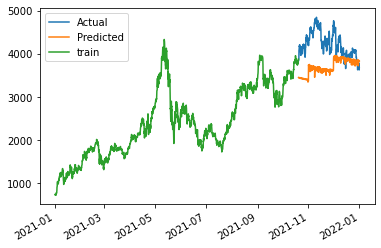

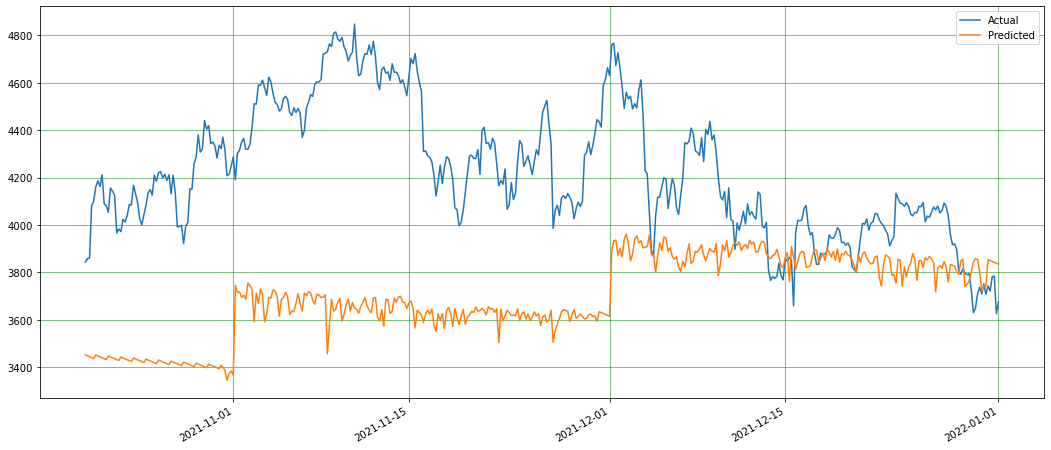

In [70]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [71]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [72]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 2.16 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [73]:
Model_R.best_params_

{'random_state': 40, 'min_samples_leaf': 50, 'max_depth': 50}

# Evaluation Measures on Test data

# MSE

In [74]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  814023.92031


# MAE

In [75]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  863.96541


# RMSE

In [76]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  902.23274


# MAPE

In [77]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.20252


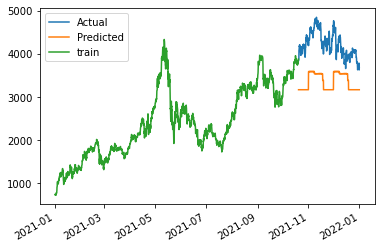

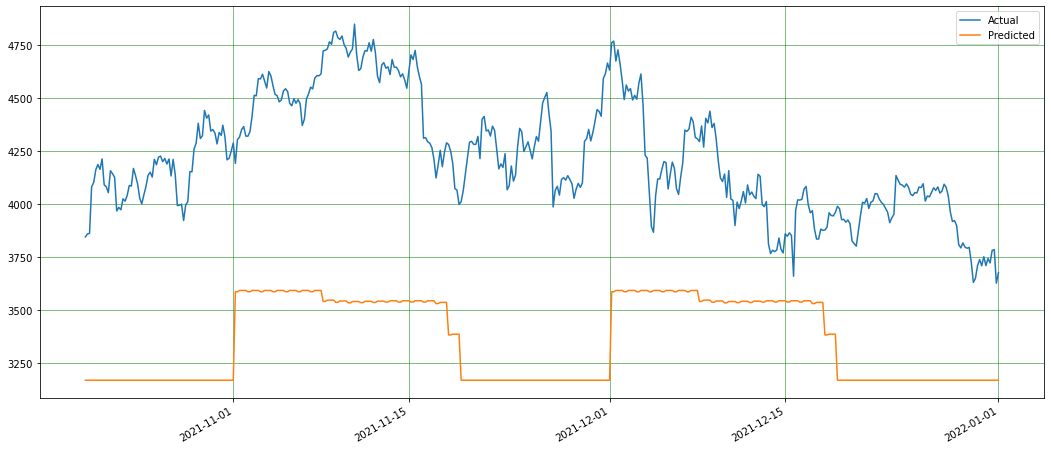

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [79]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [80]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 15.4 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [81]:
Model_R.best_params_

{'n_estimators': 200, 'max_depth': 30, 'learning_rate': 0.1, 'base_score': 0.5}

# Evaluation Measures on Test data

# MSE

In [82]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  689110.33451


# MAE

In [83]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  757.44872


# RMSE

In [84]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  830.1267


# MAPE

In [85]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.17592


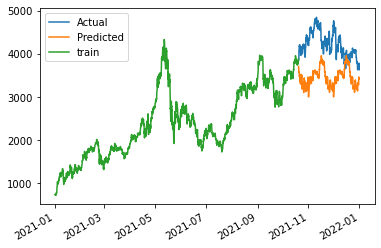

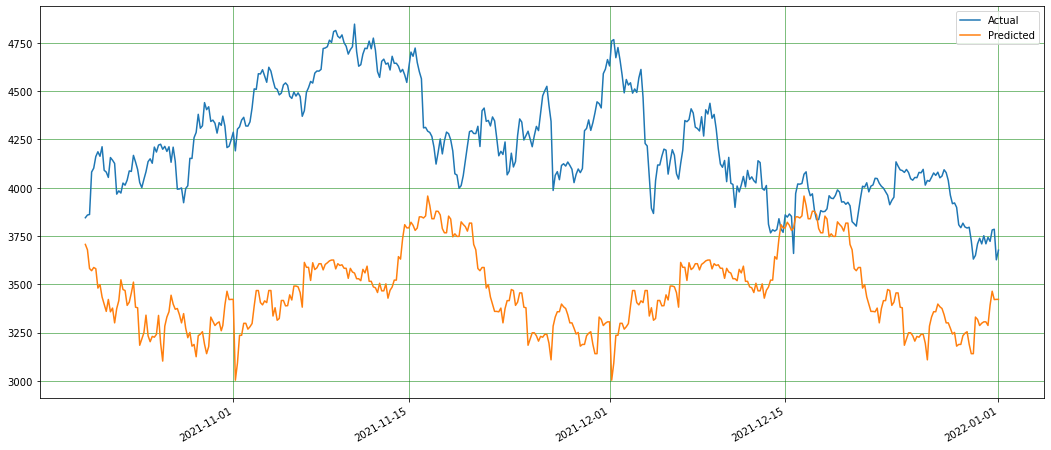

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [87]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SVR Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MSE score  |
+-------------------------+------------+
|      KNN Algorithm      | 146889.573 |
|      SVR Algorithm      | 189059.465 |
|      MLP Algorithm      | 903525.843 |
|     Ridge Algorithm     | 396803.319 |
| Random Forest Algorithm | 814023.92  |
|      XGB Algorithm      | 689110.335 |
+-------------------------+------------+




# Comparison of all algorithms Results on MAE score

In [88]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["KNN Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SVR Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|      KNN Algorithm      |  317.217  |
|      SVR Algorithm      |   356.74  |
|      MLP Algorithm      |  827.414  |
|     Ridge Algorithm     |  534.873  |
| Random Forest Algorithm |  863.965  |
|      XGB Algorithm      |  757.449  |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [89]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SVR Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|      KNN Algorithm      |  383.262   |
|      SVR Algorithm      |   434.81   |
|      MLP Algorithm      |   950.54   |
|     Ridge Algorithm     |  629.923   |
| Random Forest Algorithm |  902.233   |
|      XGB Algorithm      |  830.127   |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [90]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SVR Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|      KNN Algorithm      |   0.073    |
|      SVR Algorithm      |   0.081    |
|      MLP Algorithm      |   0.192    |
|     Ridge Algorithm     |   0.123    |
| Random Forest Algorithm |   0.203    |
|      XGB Algorithm      |   0.176    |
+-------------------------+------------+


